In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
%matplotlib inline

# MINST Dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
type(X)

pandas.core.frame.DataFrame

5


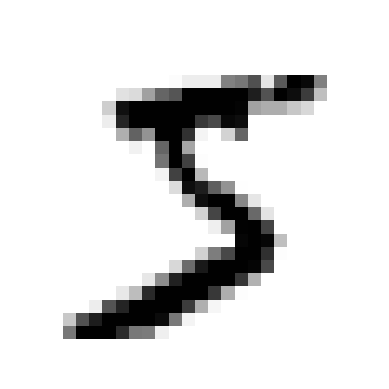

In [6]:
some_digit = X.iloc[0].values.reshape(28, -1)
plt.imshow(some_digit, cmap="binary")
plt.axis("off")
print(y[0])

In [7]:
type(y)

pandas.core.series.Series

In [8]:
# y => is categories list
# let's convert it to numbers
y = y.astype(np.uint8)
# MINST Is already splitted into train (6000), test
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

# Multilabel Classification
> such classification that output multiple binary classifications
- eg., face recogniation of 3 faces, input will be image and output will be (Alice, Bob, Not Jon) [1, 0, 1]

In [9]:
# let's look on simpler example
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_train_multilabel = np.c_[y_train_large, y_train_odd]

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_multilabel)

KNeighborsClassifier()

**KNN classifier** support multilabel (where some models won't)

In [14]:
some_digit = X.iloc[[0], :]

knn_clf.predict(some_digit) # correct ans

array([[False,  True]])

In [15]:
from sklearn.model_selection import cross_val_predict

In [16]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train_multilabel, cv=3)

In [17]:
from sklearn.metrics import f1_score

In [19]:
f1_score(y_train_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [20]:
f1_score(y_train_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

    
    average : {'micro', 'macro', 'samples', 'weighted', 'binary'} or None,             default='binary'
    This parameter is required for multiclass/multilabel targets.
    If ``None``, the scores for each class are returned. Otherwise, this
    determines the type of averaging performed on the data:

    ``'binary'``:
        Only report results for the class specified by ``pos_label``.
        This is applicable only if targets (``y_{true,pred}``) are binary.
    ``'micro'``:
        Calculate metrics globally by counting the total true positives,
        false negatives and false positives.
    ``'macro'``:
        Calculate metrics for each label, and find their unweighted
        mean.  This does not take label imbalance into account.
    ``'weighted'``:
        Calculate metrics for each label, and find their average weighted
        by support (the number of true instances for each label). This
        alters 'macro' to account for label imbalance; it can result in an
        F-score that is not between precision and recall.
    ``'samples'``:
        Calculate metrics for each instance, and find their average (only
        meaningful for multilabel classification where this differs from
        :funcore`).u
</pre>nc:`accuracy_score`).
 
</div>unc:`accuracy_score`).

- `macro` will return average/mean of F1_score of each label
- `weighted` will return weighted mean of F1_score of each label
  - if there's class repeated more will give more importance
  - eg., if there's many faces of "Alice" 

# Multioutput Classification

its more genreal case of `multilabel classification` where each label can have multiple class
> eg.,
> noise removal system where foreach label output intensity\
> multilabel as there's label for each pixel\
> multioutput as there's different output for each label \
> (here there's thin line between regression & classification) as predict intensity will be more akin to regression

In [30]:
# lets create train set by getting image and add random noise to it
noise = np.random.randint(0, 100, X_train.shape)
X_train_mod = X_train + noise

In [27]:
# for test dataset
noise = np.random.randint(0, 100, X_test.shape)
X_test_mod = X_test + noise

In [28]:
y_train_mod = X_train
y_test_mod = X_test

(-0.5, 27.5, 27.5, -0.5)

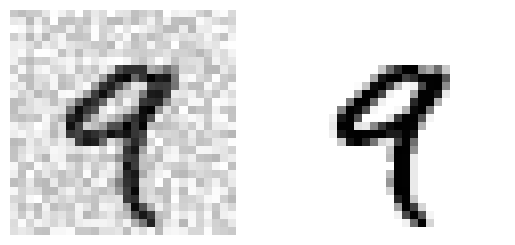

In [34]:
plt.subplot(121)
plt.imshow(X_train_mod.iloc[4].values.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.subplot(122)
plt.imshow(y_train_mod.iloc[4].values.reshape(28, 28), cmap="binary")
plt.axis("off")

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [38]:
clean_digit = knn_clf.predict(X_train_mod.iloc[[4], :])

(-0.5, 27.5, 27.5, -0.5)

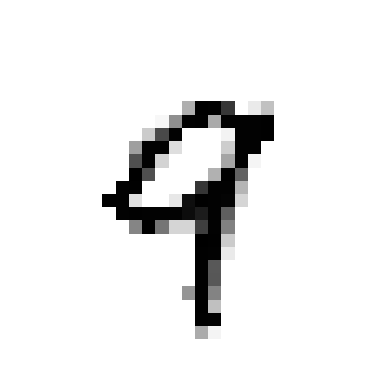

In [40]:
plt.imshow(clean_digit.reshape(28, 28), cmap="binary")
plt.axis("off")